Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [93]:
NAME = "Barthélemy Paléologue"
COLLABORATORS = ""

---

# IN573 Lab2 : Edge extraction

In this second lab, the goal is to develop linear operators on images and extract image edges.

More specifically, we will implement a Canny edge extractor.


Please read first this [tutorial on the cv2.Canny function](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) to get an overview of the process.

In [94]:
%matplotlib inline

import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv2 # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting
from matplotlib import colors # ploting

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


This `imshow` function is provided to display arrays of `images` with `titles`.
You can adjust the default `figsize` of (15,20) to your screen.

In [95]:

def imshow(images, titles, nrows = 0, ncols=0, figsize = (15,20)):
    """Plot a multiple images with titles.

    Parameters
    ----------
    images : image list
    titles : title list
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    if ncols == 0 and nrows == 0:
      ncols = len(images)
      nrows = 1
    if ncols == 0:
      ncols = len(images) // nrows
    if nrows == 0:
      nrows = len(images) // ncols
      
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, squeeze=False, figsize = figsize)
    for i, image in enumerate(images):
        axeslist.ravel()[i].imshow(image, cmap=plt.gray(), vmin=0, vmax=255)
        axeslist.ravel()[i].set_title(titles[i])
        axeslist.ravel()[i].set_axis_off()
    plt.tight_layout() # optional


For this lab, please use a [road image](https://www.umr-lastig.fr/mathieu-bredif/data/road.jpg), typical to autonomous driving applications.

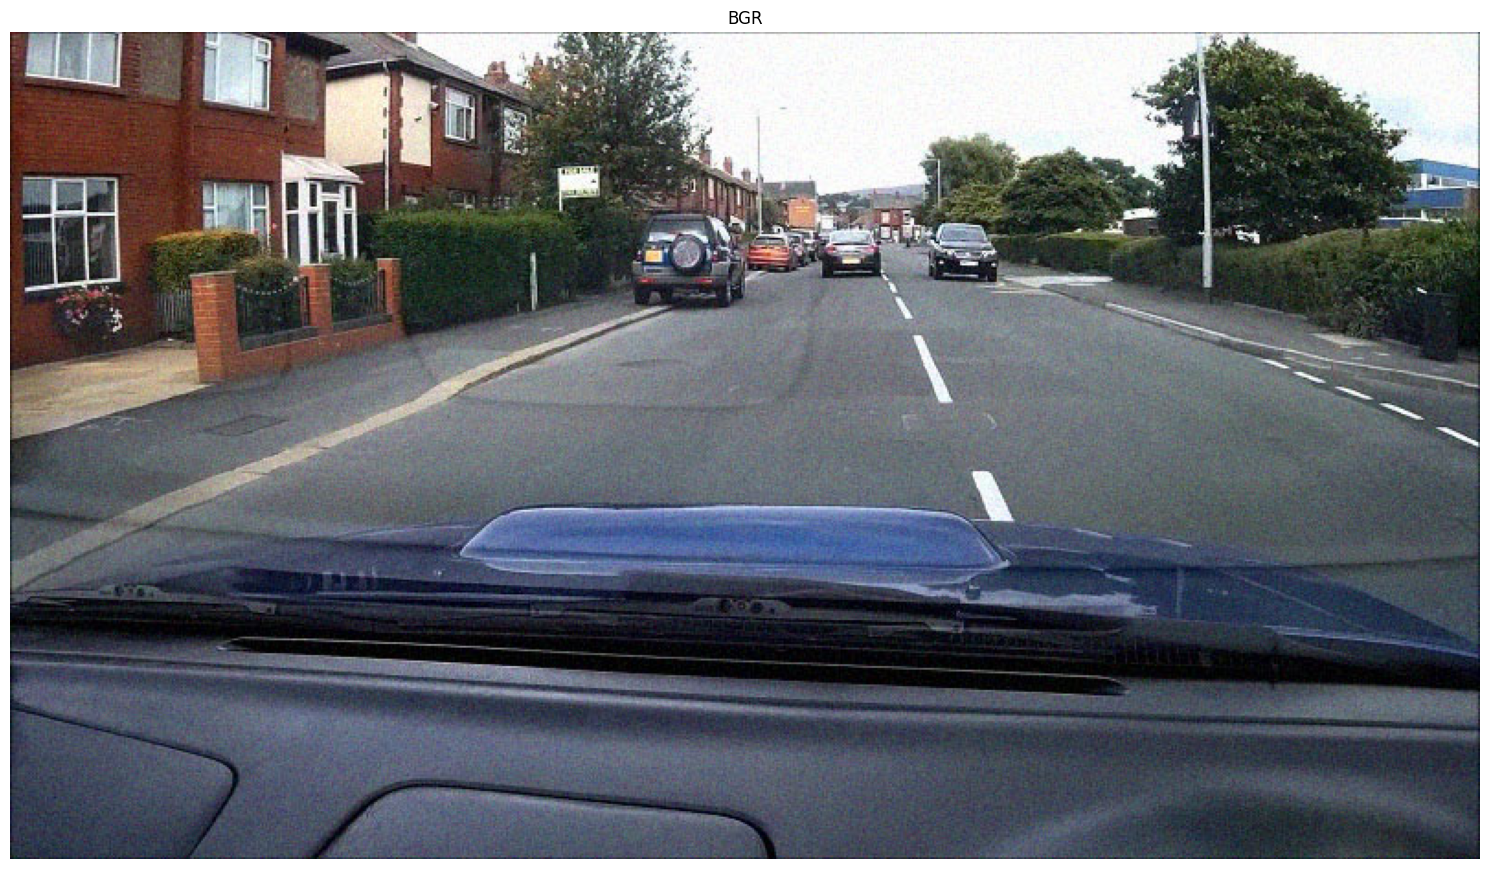

In [96]:
url = 'https://www.umr-lastig.fr/mathieu-bredif/data/road.jpg'
imageBGR = io.imread( url ) 
imshow( [imageBGR], ['BGR'])
  

# Image gradients

First, to simplify things, let's work with a gray level image.
Opencv offers many image processing functions such as the computation of image gradients. Here are the gradients computed with the 3x3 Sobel filter.

Why is there less gradient in the x direction ?

The gradient in the X direction is sensitive to vertical edges. As the image has mostly horizontal edges (such as the car), the gradient in the X direction is low.

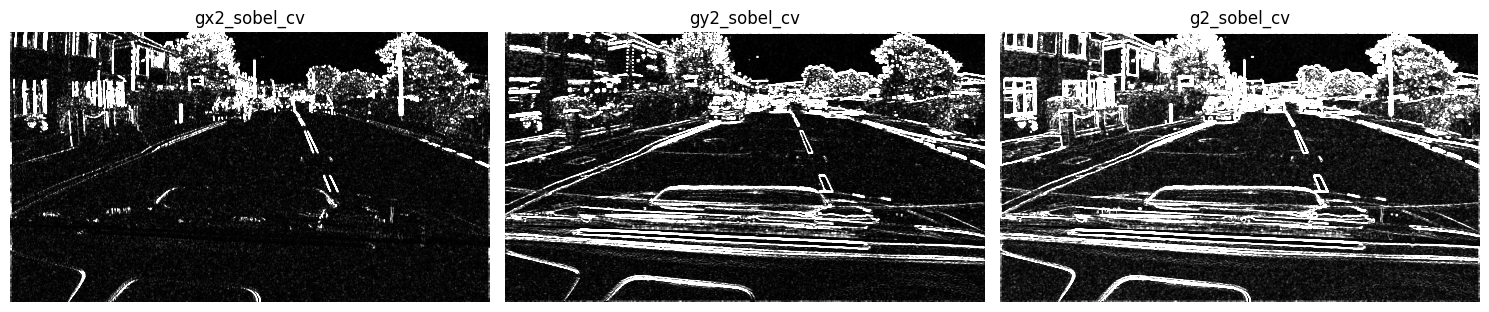

In [97]:
imageGray = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2GRAY)
gx_sobel_cv = cv2.Sobel(imageGray,cv2.CV_64F,1,0,3)/8
gy_sobel_cv = cv2.Sobel(imageGray,cv2.CV_64F,0,1,3)/8
gx2_sobel_cv = gx_sobel_cv ** 2
gy2_sobel_cv = gy_sobel_cv ** 2
g2_sobel_cv = gx2_sobel_cv + gy2_sobel_cv
imshow([gx2_sobel_cv, gy2_sobel_cv, g2_sobel_cv], ['gx2_sobel_cv', 'gy2_sobel_cv', 'g2_sobel_cv'])

Implement simple gradients using a central finite difference scheme.

A **central** finite difference scheme (f(i+1)-f(i-1)) ensures that the quantity is located at a pixel location (i), contrary to the **forward** scheme (f(i+1)-f(i)) which is located inbetween pixels at (i+0.5).

This ensures that the both gradients are defined at the pixel centers (i,j) rather than being of at (i+0.5,j) and (i,j+0.5), so that we can use them to estimate the gradient vector at (i,j)

In this question and the following, use a consistent handling of the image boundaries. What do you do when the convolution filter footprint is not entirely contained in the image ? The easiest way is to only compute and return values of pixels which convolution filter are entirely enclosed in the original images. For a 3x3 filter, that means that the output image is 2 rows and 2 columns smaller.

In [98]:
def gradient_y_diff(img):
    img = img.astype(float)
    # convolution kernel
    kernel = np.array([[0, 1, 0], [0, 0, 0], [0, -1, 0]])
    output = np.zeros(img.shape)
    padded_img = np.pad(img, 1, mode='constant')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = np.sum(padded_img[i:i+3, j:j+3]*kernel)
    return output


def gradient_x_diff(img):
    img = img.astype(float)
    # convolution kernel
    kernel = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
    output = np.zeros(img.shape)
    padded_img = np.pad(img, 1, mode='constant')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = np.sum(padded_img[i:i+3, j:j+3]*kernel)
    return output


gx_diff = gradient_x_diff(imageGray)/2
gy_diff = gradient_y_diff(imageGray)/2
gx2_diff = gx_diff ** 2
gy2_diff = gy_diff ** 2
g2_diff = gx2_diff + gy2_diff
imshow([gx2_diff, gy2_diff, g2_diff], ['gx2_diff', 'gy2_diff', 'g2_diff'])

KeyboardInterrupt: 

Now, try to reimplement the Sobel 3x3 filter, which coefficients are :

```
-1  0  1           1  2  1
-2  0  2   and     0  0  0
-1  0  1          -1 -2 -1
```



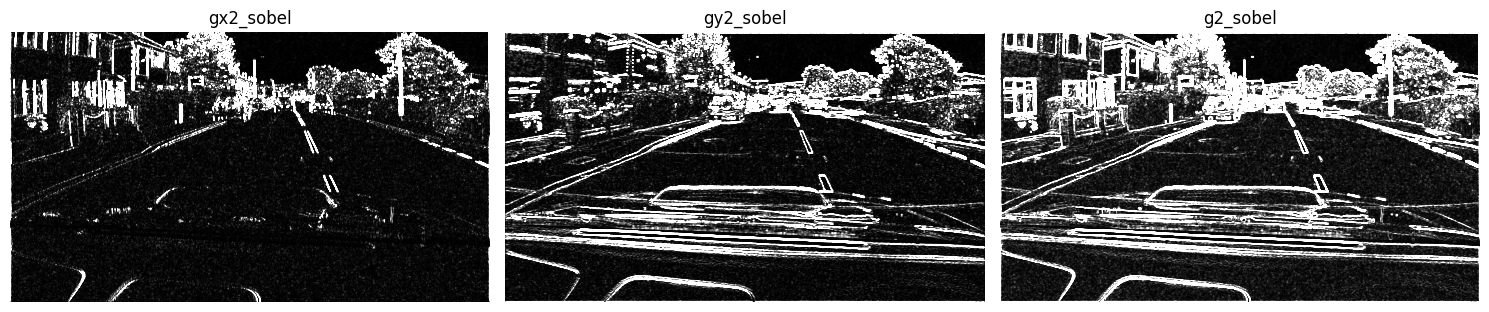

In [ ]:
def gradient_y_sobel(img):
  img = img.astype(float)
  kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  output = np.zeros(img.shape)
  padded_img = np.pad(img, 1, mode='constant')
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      output[i, j] = np.sum(padded_img[i:i+3, j:j+3]*kernel)
  return output


def gradient_x_sobel(img):
  img = img.astype(float)
  kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  output = np.zeros(img.shape)
  padded_img = np.pad(img, 1, mode='constant')  
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      output[i, j] = np.sum(padded_img[i:i+3, j:j+3]*kernel)
  return output

gx_sobel = gradient_x_sobel(imageGray)/8
gy_sobel = gradient_y_sobel(imageGray)/8
gx2_sobel = gx_sobel ** 2
gy2_sobel = gy_sobel ** 2
g2_sobel = gx2_sobel + gy2_sobel
imshow([gx2_sobel, gy2_sobel, g2_sobel], ['gx2_sobel', 'gy2_sobel', 'g2_sobel'])

Define the threshold function that takes an image and a threshold value and output an image of the same size which pixel values are 255 if the input value is above the threshold, or 0 otherwise.

In [ ]:
def threshold(img, value):
  img = img.astype(float)
  output = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i, j] > value:
        output[i, j] = 255
      else:
        output[i, j] = 0
  return output


Try to find the best threshold, that do not select noise, but that miss no meaningful edge.

In [ ]:
# replace Nones by the values
g2_diff_threshold = 1000
g2_sobel_threshold = 1000
g2_sobel_cv_threshold = 1000


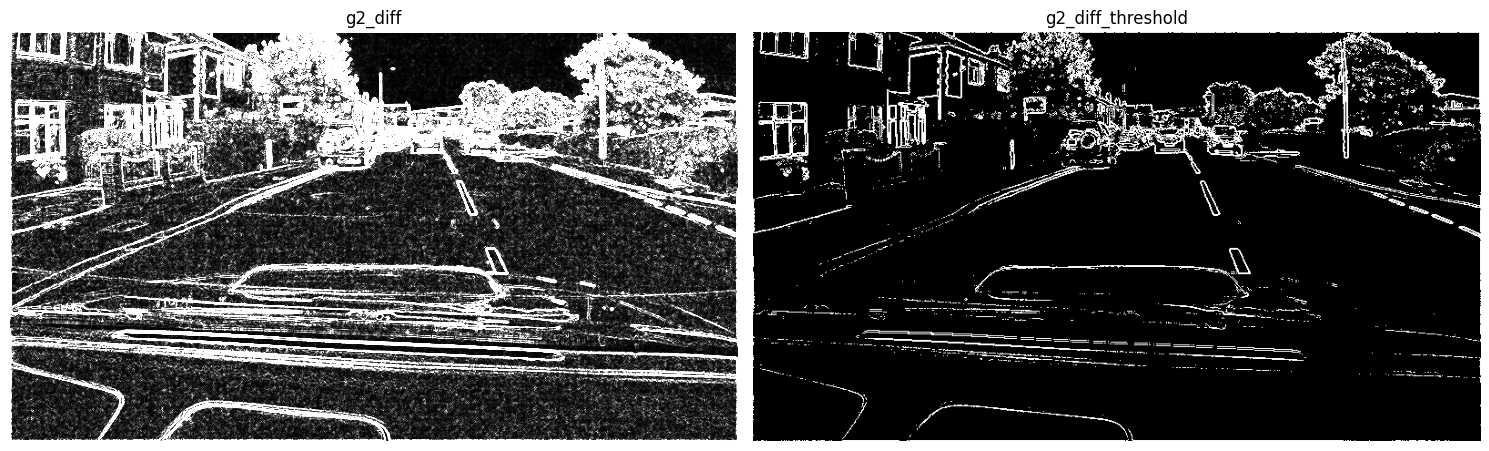

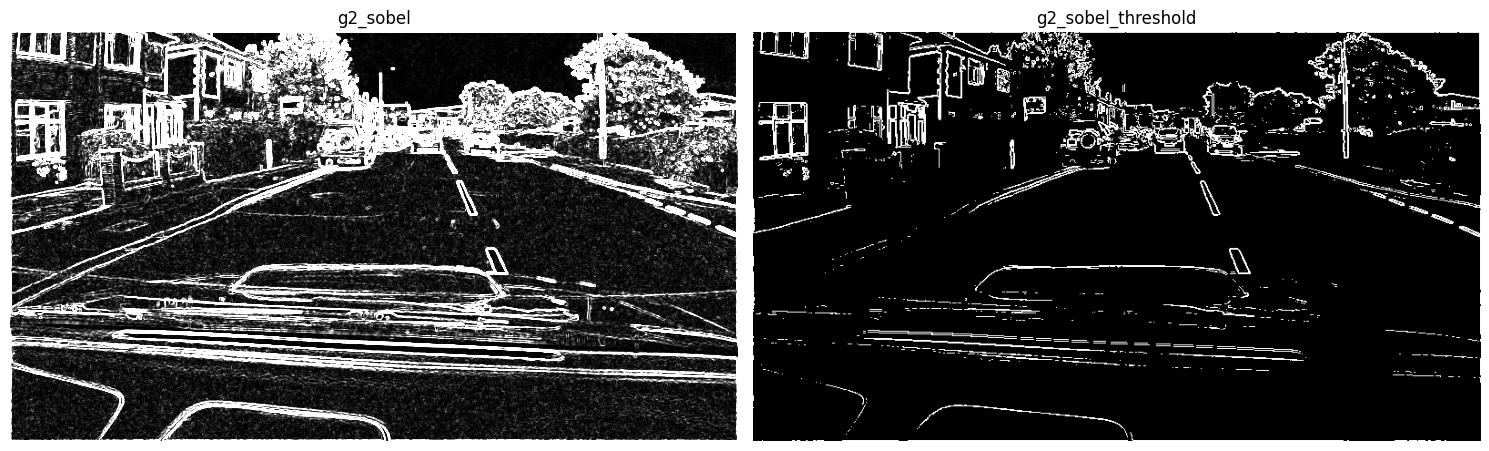

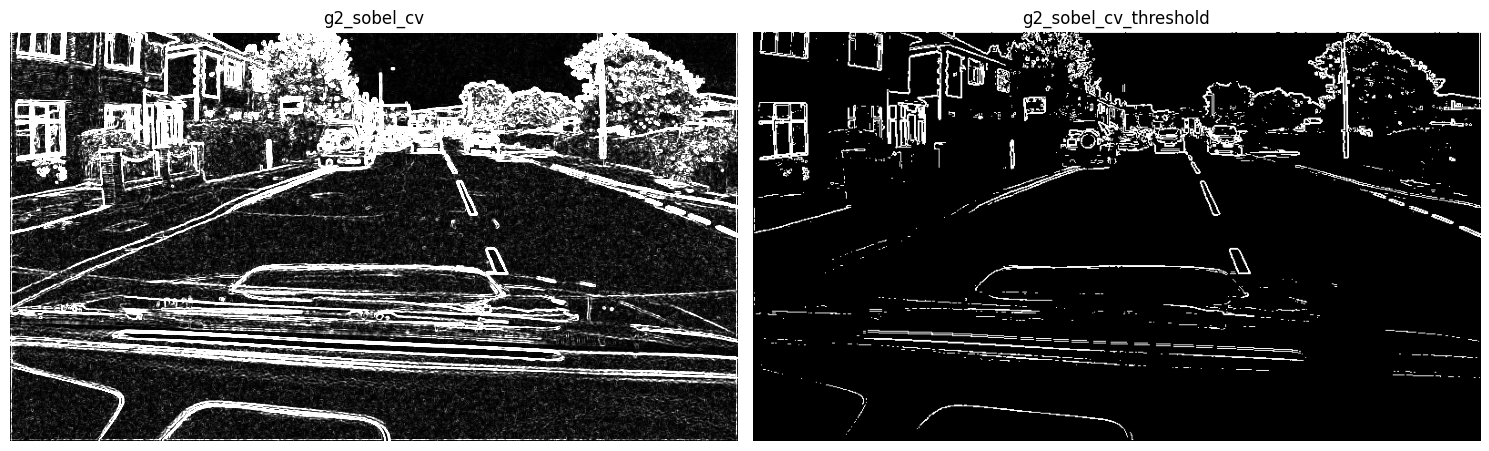

In [ ]:
imshow([g2_diff, threshold(g2_diff, g2_diff_threshold)], ['g2_diff', 'g2_diff_threshold'])
imshow([g2_sobel, threshold(g2_sobel, g2_sobel_threshold)], ['g2_sobel', 'g2_sobel_threshold'])
imshow([g2_sobel_cv, threshold(g2_sobel_cv, g2_sobel_cv_threshold)], ['g2_sobel_cv', 'g2_sobel_cv_threshold'])

Try to find the best threshold, that does not select noise, but that misses no meaningful edge. Is that an easy task ?
Can you see that the *diff* estimation of the gradients is nosier than *Sobel*, as you can see at low threshold values. Please comment on the trade-off between a high and a low threshold

Finding a good threshold is complicated and requires a lot of trial and error. When setting the threshold to 100 for example, it is clear that the diff estimation has much more noise than Sobel. High threshold helps with removing noise, but it also removes some of the edges. Low threshold helps with detecting more edges, but it also detects more noise. There is therefore a trade-off between the two.

In [ ]:
@interact(value = (0,50,1))
def imshow_threshold(value):
  threshold_diff = threshold(g2_diff, value*value)
  threshold_sobel = threshold(g2_sobel, value*value)
  imshow([threshold_diff, threshold_sobel],['threshold_diff', 'threshold_sobel'])

interactive(children=(IntSlider(value=25, description='value', max=50), Output()), _dom_classes=('widget-inter…

Let us now implement the [Canny edge detector](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).

- cv2.cartToPolar will help you to convert `gx`, `gy` into polar coordinates `mag`nitude and `ang`le in degrees.
- the output is an image of the same size as the input gradients, with 3 values: 
 - 0 : not an edge
 - 127 : weak edge
 - 255 : strong edge
- non local maximum suppression is carried out by figuring out which quadrant is pointed out by the gradient vector (in degrees) and discard the pixel (edge=0) if it does not have a higher gradient magnitude than its 2 neighbors.
 - [-22.5, 22.5] or [157.5, 202.5] -> horizontal neighbors.
 - [22.5, 67.5] or [202.5, 247.5] -> diagonal neighbors.
 - [67.5, 112.5] or [247.5, 292.5] -> vertical neighbors.
 - [112.5, 157.5] or [292.5, 337.5] -> the other diagonal neighbors.
- queue is a FIFO that is responsible of the selection by breadth-first search of all strong edges (high threshold pixels) and all weak edges that are connected through a path of low threshold pixels to a strong edge. It is initialized with all strong edges. Then we loop over its elements using `while queue` and `queue.popleft` until it is empty. To process a poped element, look at its 8 neighbors and enqueue weak edges if they have not been discovered yet.

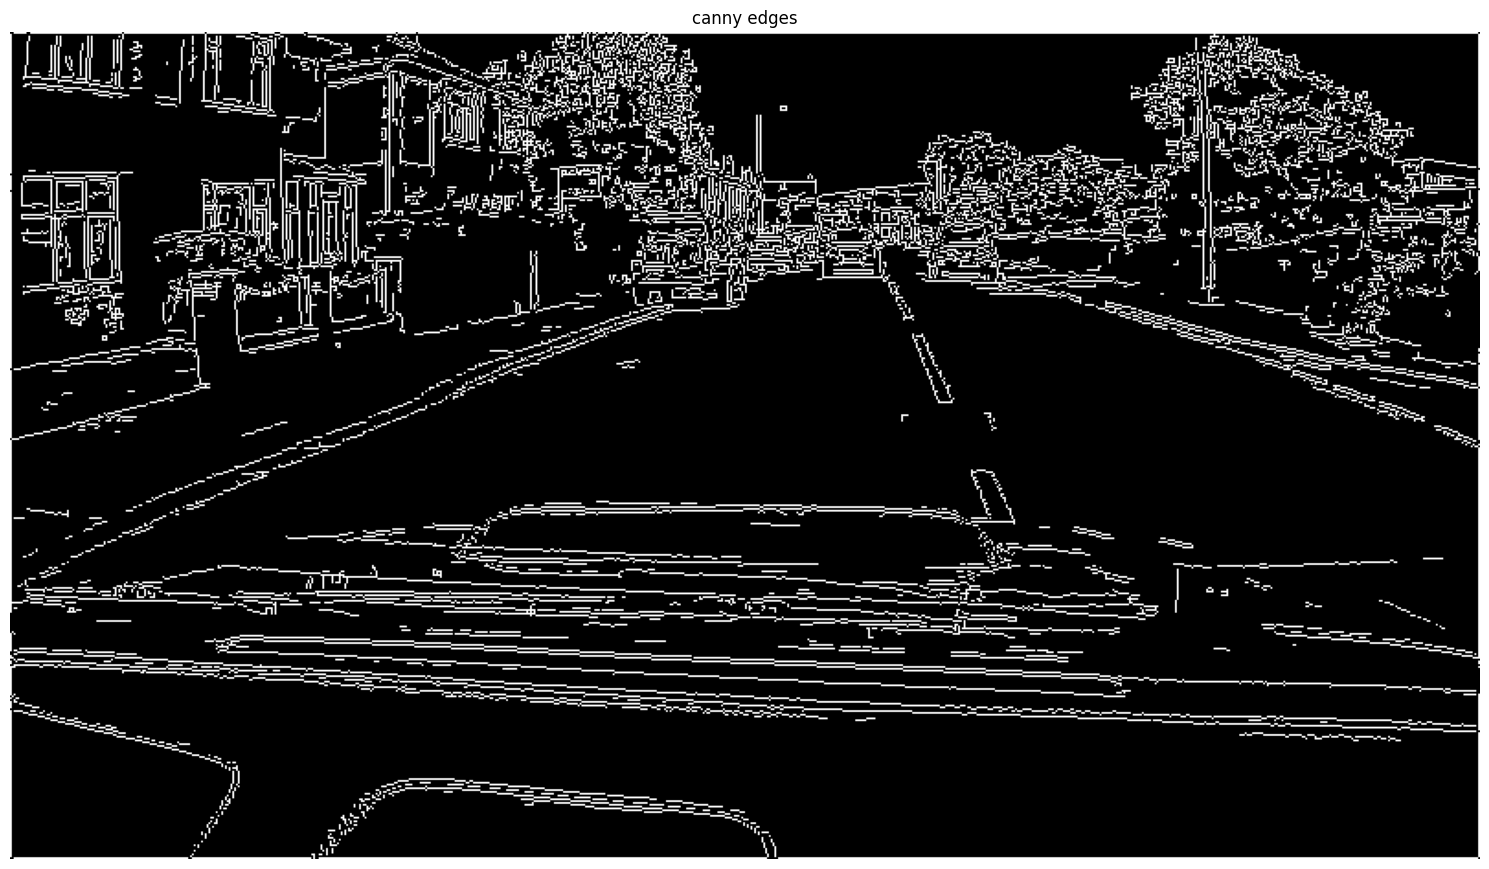

In [157]:
from collections import deque


def canny(gx, gy, low=None, high=None):

    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    if not high:
        high = 0.5 * mag.max()
    if not low:
        low = 0.1 * mag.max()

    height, width = mag.shape

    queue = deque()
    edges = np.zeros_like(mag)

    for i_x in range(width):
        for i_y in range(height):

            grad_ang = ang[i_y, i_x]

            # tests to compute the neighbor coordinates in the direction of the gradient grad_ang
            if (grad_ang >= -22.5 and grad_ang <= 22.5) or (grad_ang >= 157.5 and grad_ang <= 202.5):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            elif (grad_ang >= 22.5 and grad_ang <= 67.5) or (grad_ang >= 202.5 and grad_ang <= 247.5):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            elif (grad_ang >= 67.5 and grad_ang <= 112.5) or (grad_ang >= 247.5 and grad_ang <= 292.5):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            elif (grad_ang >= 112.5 and grad_ang <= 157.5) or (grad_ang >= 292.5 and grad_ang <= 337.5):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
            elif (grad_ang >= 157.5 and grad_ang <= 202.5) or (grad_ang >= 337.5 and grad_ang <= 360):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            # clamp the coordinates to the image size
            if neighb_1_x >= width:
                neighb_1_x = width - 1
            elif neighb_1_x < 0:
                neighb_1_x = 0
            if neighb_2_x >= width:
                neighb_2_x = width - 1
            elif neighb_2_x < 0:
                neighb_2_x = 0
            if neighb_1_y >= height:
                neighb_1_y = height - 1
            elif neighb_1_y < 0:
                neighb_1_y = 0
            if neighb_2_y >= height:
                neighb_2_y = height - 1
            elif neighb_2_y < 0:
                neighb_2_y = 0

            # Now look at the magnitude of the gradients at the 2 neigbors and
            # discard i_y,i_x if its magnitude is inferior (by setting mag[i_y, i_x] to 0)

            mag1 = mag[neighb_1_y, neighb_1_x]
            mag2 = mag[neighb_2_y, neighb_2_x]
            if mag[i_y, i_x] < mag1 or mag[i_y, i_x] < mag2:
                mag[i_y, i_x] = 0

            if mag[i_y, i_x] >= high:
                # append (i_y, i_x) to the queue
                # mark it at a strong edge (assign 255 to this pixel in 'edges')
                queue.append((i_y, i_x))
                edges[i_y, i_x] = 255
            elif mag[i_y, i_x] < low:
                # mark it as a non edge (assign 0 to this pixel in 'edges')
                edges[i_y, i_x] = 0
            else:
                # mark it as a weak edge (assign 128 to this pixel in 'edges')
                edges[i_y, i_x] = 128

    while queue:
        p = queue.popleft()
        for i in range(-1, 2):
            for j in range(-1, 2):
                i_y = p[0] + i
                i_x = p[1] + j
                
                try:
                    if edges[i_y, i_x] == 128:
                        edges[i_y, i_x] = 255
                        queue.append((i_y, i_x))
                except IndexError:
                    pass

    edges[edges == 128] = 0

    return edges


imshow([canny(gx_sobel, gy_sobel, 12, 19)], ['canny edges'])

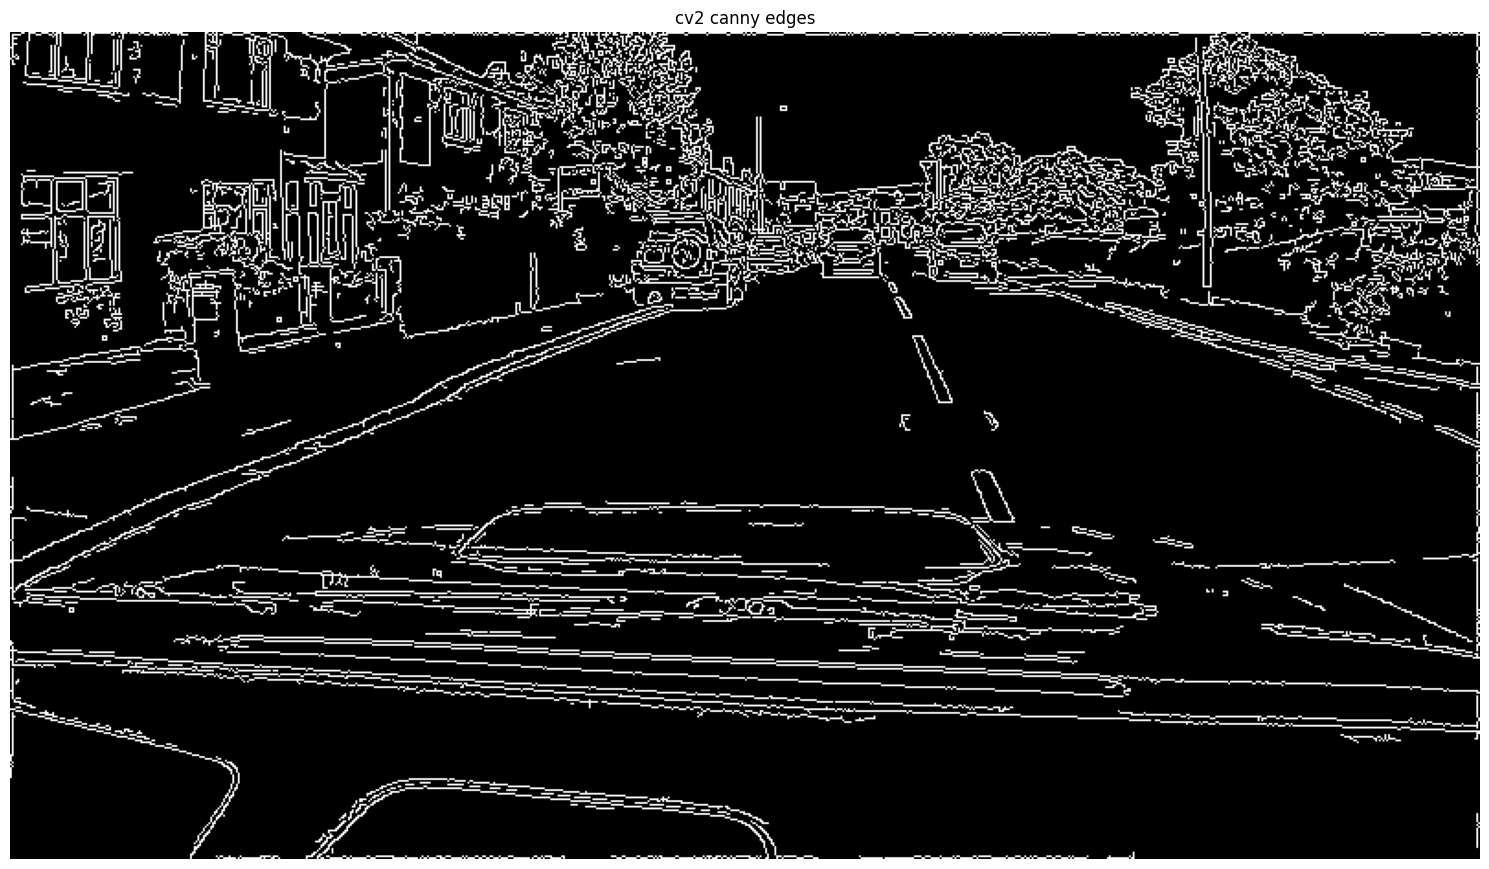

In [153]:
def cv2_canny(img, low, high):
  return cv2.Canny(img, low, high)

imshow([cv2_canny(imageGray, 100, 200)], ['cv2 canny edges'])

Finally, you can tune the low and high thresholds of the weak and strong edges to improve the edge detection. What are the best low and high parameters, to get all edges necessary for driving but little unecessary lines ?

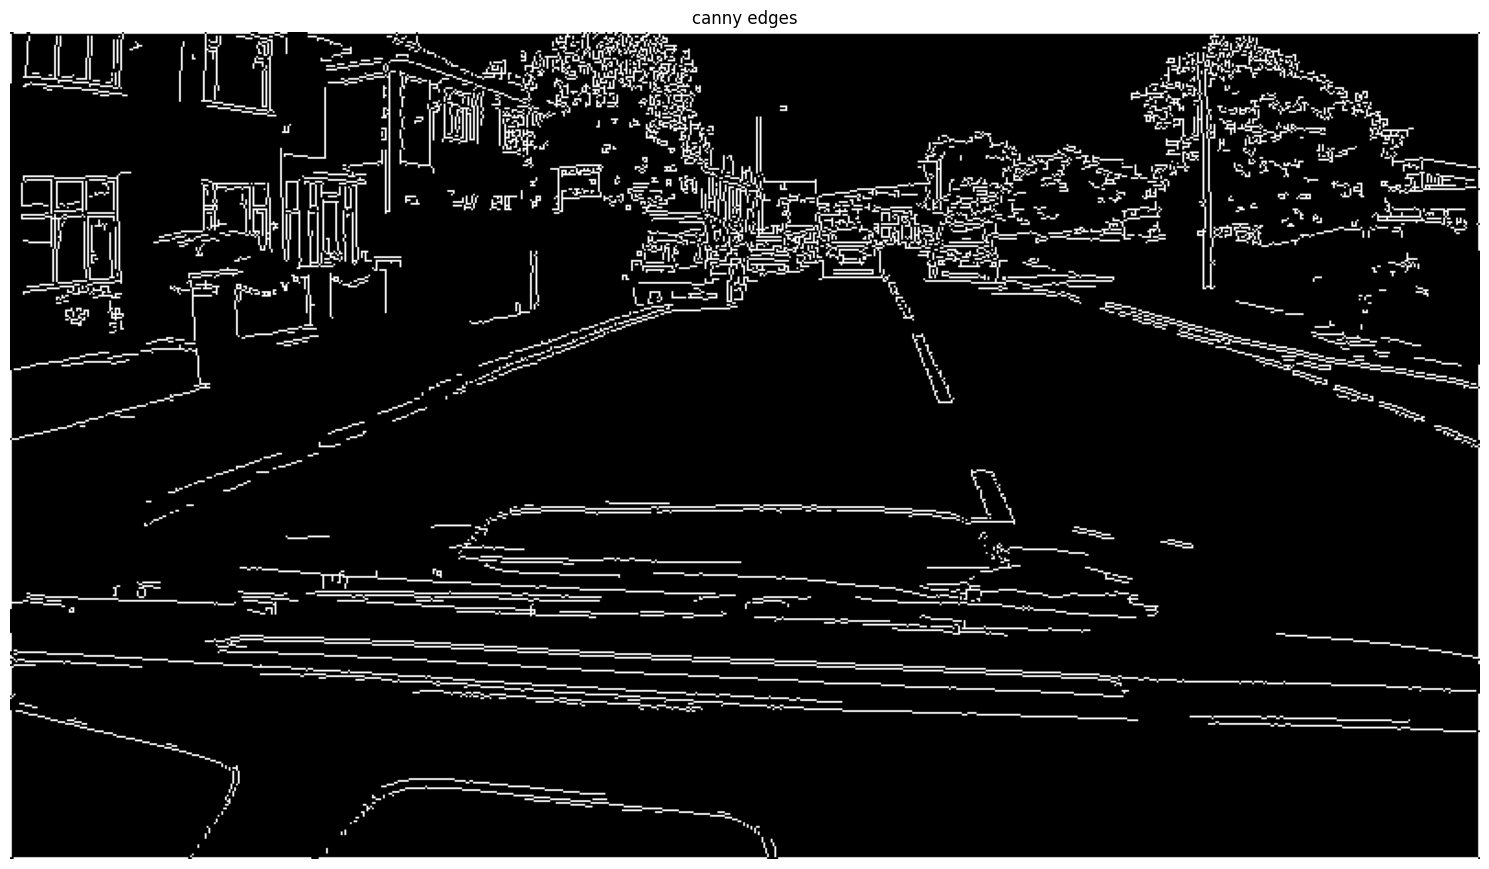

In [163]:
low = 15
high = 30

imshow([canny(gx_sobel, gy_sobel, low, high)], ['canny edges'])

In [158]:
@interact(low = (0,50,1), high = (0,100,1))
def imshow_canny(low, high):
  imshow([canny(gx_sobel, gy_sobel, low, high)], ['canny edges'])

interactive(children=(IntSlider(value=25, description='low', max=50), IntSlider(value=50, description='high'),…

# Extra credits

Implement a Harris Corner detector

In [ ]:
def harris_corner(gx, gy, sigma, threshold):
  # YOUR CODE HERE
  raise NotImplementedError()
    
image = np.copy(imageBGR[1:-1,1:-1])
harris = harris_corner(gx_sobel, gy_sobel, 1, 50)
harris = cv2.dilate(harris, None)
image[harris>0] = [255, 0, 0]
imshow([image, gx_sobel**2, gy_sobel**2, harris], ['Input', 'gx2', 'gy2','Harris corners'])
imshow([image], ['Result'])